In [1]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go
import json
from shapely import wkt
from plotly.subplots import make_subplots

In [2]:
# Load csv file for wildfire data
wildfires = Path("resources/2- annual-area-burnt-by-wildfires.csv")
wildfire_df = pd.read_csv(wildfires)

wildfire_df.head()
wildfire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entity                          3354 non-null   object
 1   Code                            3276 non-null   object
 2   Year                            3354 non-null   int64 
 3   Annual area burnt by wildfires  3354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 104.9+ KB


In [3]:
# Rename columns
wildfire_df = wildfire_df.rename(columns = {
    "Entity" : "Country", 
    "Code" : 'Alpha-3 code', 
    "Annual area burnt by wildfires" : "Acres Burned"
})

wildfire_df.head()

,Country,Alpha-3 code,Year,Acres Burned
0,Afghanistan,AFG,2012,10430
1,Afghanistan,AFG,2013,5892
2,Afghanistan,AFG,2014,5134
3,Afghanistan,AFG,2015,4084
4,Afghanistan,AFG,2016,9681


In [4]:
# Drop null values
wildfire_df.dropna(inplace=True)
wildfire_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       3276 non-null   object
 1   Alpha-3 code  3276 non-null   object
 2   Year          3276 non-null   int64 
 3   Acres Burned  3276 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 128.0+ KB


In [5]:
# wildfire_df.to_csv("clean_fires.csv", index = False)

In [6]:
# Separate DF by year
df_2012 = wildfire_df[wildfire_df["Year"] ==2012]
df_2013 = wildfire_df[wildfire_df["Year"] ==2013]
df_2014 = wildfire_df[wildfire_df["Year"] ==2014]
df_2015 = wildfire_df[wildfire_df["Year"] ==2015]
df_2016 = wildfire_df[wildfire_df["Year"] ==2016]
df_2017 = wildfire_df[wildfire_df["Year"] ==2017]
df_2018 = wildfire_df[wildfire_df["Year"] ==2018]
df_2019 = wildfire_df[wildfire_df["Year"] ==2019]
df_2020 = wildfire_df[wildfire_df["Year"] ==2020]
df_2021 = wildfire_df[wildfire_df["Year"] ==2021]
df_2022 = wildfire_df[wildfire_df["Year"] ==2022]
df_2023 = wildfire_df[wildfire_df["Year"] ==2023]

In [7]:
# Import geographic data csv
coords = Path("resources/countries_codes_and_coordinates.csv")
coordinates_df = gpd.read_file(coords)

coordinates_df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AF,AFG,4,33,65,None
1,Åland Islands,AX,ALA,248,60.116667,19.9,None
2,Albania,AL,ALB,8,41,20,None
3,Algeria,DZ,DZA,12,28,3,None
4,American Samoa,AS,ASM,16,-14.3333,-170,None


In [8]:
coordinates_df.columns

Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)', 'geometry'],
      dtype='object')

In [9]:
# Keep only necessary columns
coordinates_df = coordinates_df[['Country', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)', 'geometry']]

coordinates_df.head()

,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,4,33,65,None
1,Åland Islands,ALA,248,60.116667,19.9,None
2,Albania,ALB,8,41,20,None
3,Algeria,DZA,12,28,3,None
4,American Samoa,ASM,16,-14.3333,-170,None


In [10]:
# Strip whitespace
coordinates_df = coordinates_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
coordinates_df.head()

,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,4,33,65,None
1,Åland Islands,ALA,248,60.116667,19.9,None
2,Albania,ALB,8,41,20,None
3,Algeria,DZA,12,28,3,None
4,American Samoa,ASM,16,-14.3333,-170,None


In [11]:
# coordinates_df.to_csv("country_coords.csv", index = False)

In [12]:
# Merge each year DF with geographic data
merged_2012 = pd.merge(df_2012, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2013 = pd.merge(df_2013, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2014 = pd.merge(df_2014, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2015 = pd.merge(df_2015, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2016 = pd.merge(df_2016, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2017 = pd.merge(df_2017, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2018 = pd.merge(df_2018, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2019 = pd.merge(df_2019, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2020 = pd.merge(df_2020, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2021 = pd.merge(df_2021, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2022 = pd.merge(df_2022, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2023 = pd.merge(df_2023, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2012.head()

,Country,Alpha-3 code,Year,Acres Burned,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,2012,10430,4,33,65,None
1,Albania,ALB,2012,176838,8,41,20,None
2,Algeria,DZA,2012,631108,12,28,3,None
3,American Samoa,ASM,2012,0,16,-14.3333,-170,None
4,Andorra,AND,2012,0,20,42.5,1.6,None


In [13]:
# Append each year DF to one DF to graph
new_fires = pd.concat([merged_2013, merged_2014, merged_2015, merged_2016, merged_2017, merged_2018, merged_2019, merged_2020, merged_2021, merged_2022, merged_2023], ignore_index = True)

In [14]:
new_fires.to_csv('new_fires.csv')

In [15]:
# Create Choropleth Map with Alpha-3 Code, slider bar is animated by Year
fig = px.choropleth(
    new_fires,
    geojson=coordinates_df['Alpha-3 code'],
    locations='Alpha-3 code',
    color='Acres Burned',
    animation_frame='Year', 
    color_continuous_scale= px.colors.sequential.Reds,
    title='Area Burnt by Wildfires over Time', 
    height = 750, 
    width = 900
)
fig.update_geos(fitbounds="locations", visible=False) 
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10000

# Export to HTML for project
fig.write_html("wildfiredata.html")
fig.show()

In [16]:
# Filter the top 10 countries based on total acres burned
total_acres_burned = new_fires.groupby('Country')['Acres Burned'].sum().sort_values(ascending=False)

# Get the top 10 countries by total acres burned
top_10_countries = total_acres_burned.head(10).index

In [17]:
# Filter the data to include only the top 10 countries
top_10_data = new_fires[new_fires['Country'].isin(top_10_countries)]


In [18]:
# Aggregate the data by country and year (sum of acres burned)
pivot_data = top_10_data.groupby(['Country', 'Year'])['Acres Burned'].sum().reset_index()

# Pivot the data to create a matrix of 'Country' vs. 'Year' with 'Acres Burned' as values
heatmap_data = pivot_data.pivot(index='Country', columns='Year', values='Acres Burned')

# Sort the rows in descending order by total acres burned
heatmap_data = heatmap_data.loc[total_acres_burned.head(10).index]

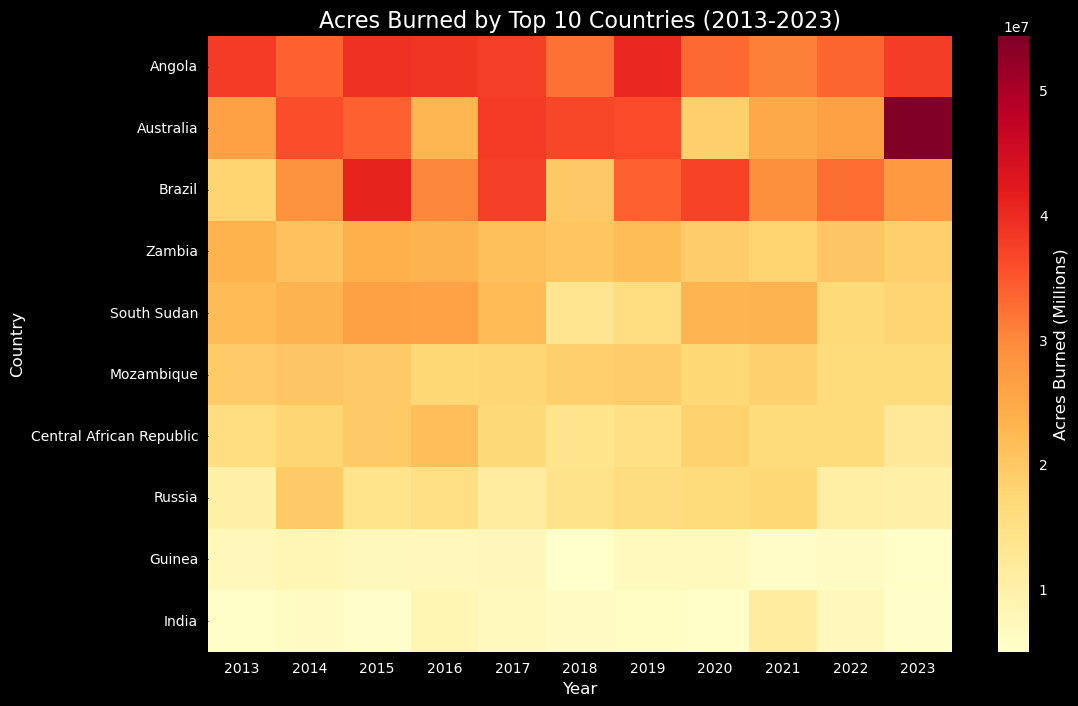

In [19]:
# Set up the plot size and style
plt.figure(figsize=(12, 8))

plt.gcf().set_facecolor('black')  # Set figure background to black
plt.gca().set_facecolor('black')

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Acres Burned (Millions)'}, color = 'white')

# Set plot labels
plt.title('Acres Burned by Top 10 Countries (2013-2023)', fontsize=16, color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Country', fontsize=12, color='white')


# Change color bar label to white
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar
colorbar.set_label('Acres Burned (Millions)', fontsize=12, color='white')  # Set colorbar label to white
colorbar.ax.tick_params(labelcolor='white')  # Set color of colorbar ticks to white


plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

# Show the plot
plt.show()


In [20]:
brazil_fire = Path('resources/brazil_fires_by_state.csv')
brazil_df = pd.read_csv(brazil_fire, encoding='ISO-8859-1')

brazil_df.head()
states = brazil_df['state']

states.unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [21]:
# brazil_states = Path('resources/br-state-codes.csv')
# states_df = gpd.read_file(brazil_states)

# # states_df.head()
# # states_df.info()
# states_df['name'].value_counts()

In [22]:
# rename states to 2-letter code so that data can merge
state_rename_mapping = {
    'Acre' : "AC",
    'Alagoas' : "AL",
    'Amapa' : "AP", 
    'Amazonas' : "AM", 
    'Bahia' : "BA", 
    'Ceara' : "CE",
    'Distrito Federal' : "DF", 
    'Espirito Santo' : "ES", 
    'Goias' : "GO", 
    'Maranhao' : "MA",
    'Mato Grosso' : "MT", 
    'Minas Gerais' : "MG", 
    'Pará' : "PA", 
    'Paraiba' :"PB", 
    'Pernambuco' : "PE",
    'Piau' : "PI",
    'Rio' : "RJ", 
    'Rondonia' : "RO",
    'Roraima' : "RR", 
    'Santa Catarina' : "SC",
    'Sao Paulo' : "SP", 
    'Sergipe' : "SE", 
    'Tocantins' : "TO"
}

In [23]:
brazil_df['state'] = brazil_df['state'].replace(state_rename_mapping)
brazil_df.head()

,year,state,month,number,date
0,1998,AC,Janeiro,0.0,1998-01-01
1,1999,AC,Janeiro,0.0,1999-01-01
2,2000,AC,Janeiro,0.0,2000-01-01
3,2001,AC,Janeiro,0.0,2001-01-01
4,2002,AC,Janeiro,0.0,2002-01-01


In [24]:
brazil_abbrev = brazil_df.rename(columns = {
 "state" : "state_abbr"
})

brazil_abbrev.head()

,year,state_abbr,month,number,date
0,1998,AC,Janeiro,0.0,1998-01-01
1,1999,AC,Janeiro,0.0,1999-01-01
2,2000,AC,Janeiro,0.0,2000-01-01
3,2001,AC,Janeiro,0.0,2001-01-01
4,2002,AC,Janeiro,0.0,2002-01-01


In [25]:
brazil_fire_2013 = brazil_abbrev[brazil_abbrev['year'] == 2013]
group_2013 = brazil_fire_2013.groupby(['year', 'state_abbr'])['number'].sum().reset_index()

group_2013.head()

,year,state_abbr,number
0,2013,AC,1108.136
1,2013,AL,208.000
2,2013,AM,905.217
3,2013,AP,975.000
4,2013,BA,2571.650


In [26]:
brazil_fire_2017 = brazil_abbrev[brazil_abbrev['year'] == 2017]
group_2017 = brazil_fire_2017.groupby(['year', 'state_abbr'])['number'].sum().reset_index()

group_2017.head()

,year,state_abbr,number
0,2017,AC,618.430
1,2017,AL,159.000
2,2017,AM,906.905
3,2017,AP,1465.000
4,2017,BA,1441.814


In [27]:
# Step 1: Load your JSON file
with open('resources/brazil_geo.json') as f:
    json_data = json.load(f)

# Step 2: Convert to GeoDataFrame (GeoPandas)
gdf = gpd.GeoDataFrame.from_features(json_data['features'])

# gdf['geometry'] = gdf['geometry'].apply(wkt.loads)

# Step 3: Check the result
print(gdf.head())

                                            geometry      name
0  POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...      Acre
1  MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ...   Alagoas
2  MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...     Amapá
3  MULTIPOLYGON (((-53.62548 -26.88481, -53.61900...  Amazonas
4  MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...     Bahia


In [28]:
state_abbr = {
    "Acre": "AC",
    "Alagoas": "AL",
    "Amapá": "AP",
    "Amazonas": "AM",
    "Bahia": "BA",
    "Ceará": "CE",
    "Espírito Santo": "ES",
    "Goiás": "GO",
    "Maranhão": "MA",
    "Mato Grosso": "MT",
    "Mato Grosso do Sul": "MS",
    "Minas Gerais": "MG",
    "Pará": "PA",
    "Paraíba": "PB",
    "Paraná": "PR",
    "Pernambuco": "PE",
    "Piauí": "PI",
    "Rio de Janeiro": "RJ",
    "Rio Grande do Norte": "RN",
    "Rio Grande do Sul": "RS",
    "Rondônia": "RO",
    "Roraima": "RR",
    "São Paulo": "SP",
    "Sergipe": "SE",
    "Tocantins": "TO"
}

In [29]:
# Assuming gdf is your GeoDataFrame with Brazilian state data
gdf['state_abbr'] = gdf['name'].map(state_abbr)

# Check the first few rows to confirm
print(gdf[['name', 'state_abbr']].head())

       name state_abbr
0      Acre         AC
1   Alagoas         AL
2     Amapá         AP
3  Amazonas         AM
4     Bahia         BA


In [30]:
# Step 2: Merge fire data with GeoDataFrame
gdf_2013 = gdf.merge(brazil_fire_2013, how='left', on='state_abbr')
gdf_2017 = gdf.merge(brazil_fire_2017, how='left', on='state_abbr')

gdf_2013.head()

,geometry,name,state_abbr,year,month,number,date
0,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre,AC,2013.0,Janeiro,0.0,2013-01-01
1,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre,AC,2013.0,Fevereiro,0.0,2013-01-01
2,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre,AC,2013.0,Março,2.0,2013-01-01
3,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre,AC,2013.0,Abril,19.0,2013-01-01
4,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",Acre,AC,2013.0,Maio,4.0,2013-01-01


In [31]:
# Step 3: Create the choropleth map for 2013
fig_2013 = px.choropleth(
    gdf_2013,
    geojson=gdf_2013.geometry,
    locations=gdf_2013.index,
    color='number',
    hover_name='name',
    hover_data=['number'],
    color_continuous_scale="Reds",
    title="Wildfires in Brazil - 2013"
)
fig_2013.update_geos(fitbounds="locations", visible=False) 


fig_2013.show()

In [ ]:

# Step 4: Create the choropleth map for 2017
fig_2017 = px.choropleth(
    gdf_2017,
    geojson=gdf_2017.geometry,
    locations=gdf_2017.index,
    color='number',
    hover_name='name',
    hover_data=['number'],
    color_continuous_scale="Reds",
    title="Wildfires in Brazil - 2017"
)
fig_2017.update_geos(fitbounds="locations", visible=False) 

# # Create a subplot with 1 row and 2 columns (side by side)
# fig = make_subplots(
#     rows=1, cols=2,
#     subplot_titles=("2013 Wildfires", "2017 Wildfires"),
#     shared_yaxes=True,  # If you want to share the y-axis between the two maps
#     specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]  # Both are choropleth maps
# )

# # Add 2013 choropleth map to the first subplot (column 1)
# fig.add_trace(
#     fig_2013.data[0],
#     row=1, col=1
# )

# # Add 2017 choropleth map to the second subplot (column 2)
# fig.add_trace(
#     fig_2017.data[0],
#     row=1, col=2
# )

# # Update layout for better appearance and more space
# fig.update_layout(
#     title_text="Comparison of Wildfires in Brazil (2013 vs 2017)",
#     geo=dict(
#         center={"lat": -14.2350, "lon": -51.9253},  # Center the map on Brazil
#         projection_type="mercator",
#         visible=False  # Hide world background to focus on Brazil
#     ),
#     showlegend=False,
#     margin={"r":0, "t":40, "l":0, "b":0},  # Adjust the margins for the layout
#     height=600,  # Height of the overall map
# )

# # Show the combined plot
# fig.show()
fig_2017.show()